# Histograma

Permite ver la distribucion empirica de una variable continua. En python se hace con matplotlib 
plt.histplot()

# Datos perdidos

Son los datos nulos, y los obtienen con .isnull()

# Variables aleatorias

Es una funcion que mapea un resultado de un espacio muestral discreto (resultados de un dado, azul,
 rojo, etc) a uno de numeros.

# Distribucion Normal

Se define con la media y la desviacion estandar, y se puede crear completamente. Se puede ver la 
funcion de densidad y la funcion acumulada. 

La probabilidad de obtener solamente un unico valor en la distribucion normal es 0!. Sin embargo, 
si uno pregunta por un rango, ahi si se obtiene una probabilidad.

# Transformacion de datos

Algunos datos no obedecen a una distribucion normal. Debido a lo anterior, estos se trasnforman
mediante una funcion (Ej: Logaritmo, 1/x, etc) y usualmente se obtiene una distribucion normal.

# Distribucion normal estandarizada

Cualquier distribucion normal (independiente de su media o desviacion estandar) se puede transformar
a una distribucion normal estandarizada.

# Puntaje Z

Permite analizar el comportamiento especifico de una observacion con respecto a la media y
desviacion estandar. Se calcula con:

z = (obs - media) / desv estandar

Permite detectar outliers! Y permite homogenizar variables y compararlas entre si.

# Variables aleatorias discretas

La mas importante es la distribucion binomial. Nos permite resumir una variable discreta segun
el conteo y la frecuencia de los eventos. 

## Ensayo de Bernoulli

Es solamente una iteracion, y el evento debe ser binario (si/no, cara/sello, etc). No entendi muy
bien esto la verdad. Se tiene mu y sigma. En scipy.stats se puede obtener a mu (media) y sigma 
(std), requiere solamente 1 valor. 1 ensayo bernoulli es lanzar 1 vez 1 moneda. 2 ensayos bernoulli
es lanzar 2 veces 1 moneda (y ambos eventos son independientes).

In [1]:
from scipy.stats import bernoulli

# La funcion bernoulli recibe mu
mu, sigma = bernoulli.stats(0.7)

# Binomial

Con np.random.binomial se pueden simular ensayos bernoulli. La binomial converge a la distribucion
normal!

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Size corresponde a la cantidad de experimentos, o puntos que se van a graficar 
# n es la cantidad de eventos que se van a realizar dentro de cada experimento (cada experimento tendra 1000 lanzadas de monedas)


# Size: Cantidad de datos a simular
# n: Cantdad de eventos que ocurren en cada ensayo/experimento
np.random.binomial(size=1, n=1000, p=0.8)

# un ensayo bernoulli es un caso especial de la binomial, ya que es cuando dentro de un experimento
# se realiza solamente un unico evento

array([781])

(array([  13.,   56.,  280., 1000., 1304., 2750., 2726., 1407.,  408.,
          56.]),
 array([64. , 66.8, 69.6, 72.4, 75.2, 78. , 80.8, 83.6, 86.4, 89.2, 92. ]),
 <BarContainer object of 10 artists>)

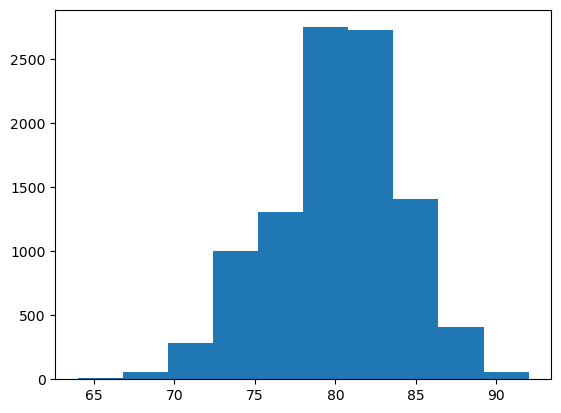

In [3]:
# En este caso, serian 100 monedas distintas, donde cada una se tira 100 veces, y la probabilidad
# de que se obtenga cara es del 80%. En terminos estadisticos, es probable que en cada experimento
# se obtengan alrededor de 80 caras!.
x = np.random.binomial(size=10000, n=100, p=0.8)
plt.hist(x)

(array([  10.,   80.,  654., 1576., 3280., 2254., 1631.,  412.,   93.,
          10.]),
 array([13. , 16.5, 20. , 23.5, 27. , 30.5, 34. , 37.5, 41. , 44.5, 48. ]),
 <BarContainer object of 10 artists>)

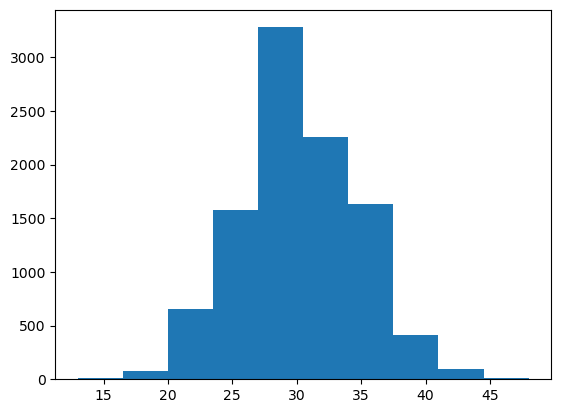

In [4]:
# Si uno cambia la probabilidad del evento, entonces la distribucion normal cambia su eje x.
# En el caso anterior, es mas probable que la cantidad de las caras sea cerca del 30% (y asi cambia
# el grafico)
x = np.random.binomial(size=10000, n=100, p=0.3)
plt.hist(x)

# Asintotico

Esto significa que el tamano de la muestra tiende a infinito (un numero infinito de experimentos/
monedas por tirar, o numero de eventos por experimento).

# Ley de los grandes numeros

Entre mas datos/experimentos se hagan, entonces mas se acercara la media empirica a la media
teorica. Si tengo infinitos ensayos (asintoticamente), entonces la media empirica sera la media
teorica!

# Teorema del Limite Central

Es super central para la inferencia estadistica, pero ni idea que weas. Si tenemos un promedio y le
restamos la media y lo dividimos por la desv estandar/la cantidad de experimentos, entonces eso
tiende a una distribucion normal!

Ej:


```python
mu, sigma = bernoulli.stats(0.65)

tamano_muestra = 100
ensayos = np.random.binomial(size=tamano_muestra, n=1, p=0.65)

calculo_limite_central = (np.mean(ensayos) - mu) / (np.std(ensayos) / tamano_muestra)

```

# Seaborn

Permite centrarse mas en el analisis que en escribir el codigo!

## Graficar histogramas

- Se hace con sns.distplot(). Si se agrega el argumento rug, entonces se agregan los datos que se estan graficando!. Lo fome es que se va a dejar de utilizar. Por lo tanto, es mejor graficar un histplot y un kdeplot en un mismo eje

## Subplots

# Correlaciones - Relacion entre variables

Recordemos que la correlacion no tiene nada que ver con la causalidad!. Puede que dos variables
esten correlacionadas, pero que no tengan causalidad. 

# Test de Hipotesis - Rechazo o No rechazo hipotesis



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import lec4_graphs

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 5)

In [6]:
df = pd.read_csv('qog_std_cs_jan18.csv')

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='undp_hdi', ylabel='Density'>

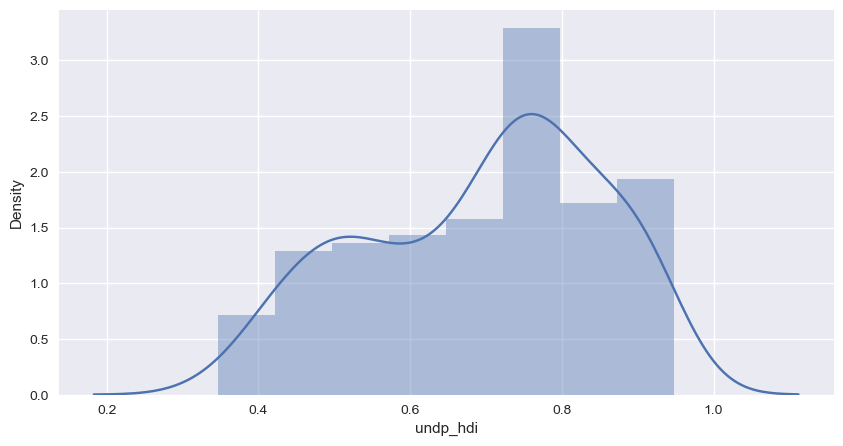

In [7]:
sns.distplot(df['undp_hdi'])

<AxesSubplot:xlabel='undp_hdi', ylabel='Density'>

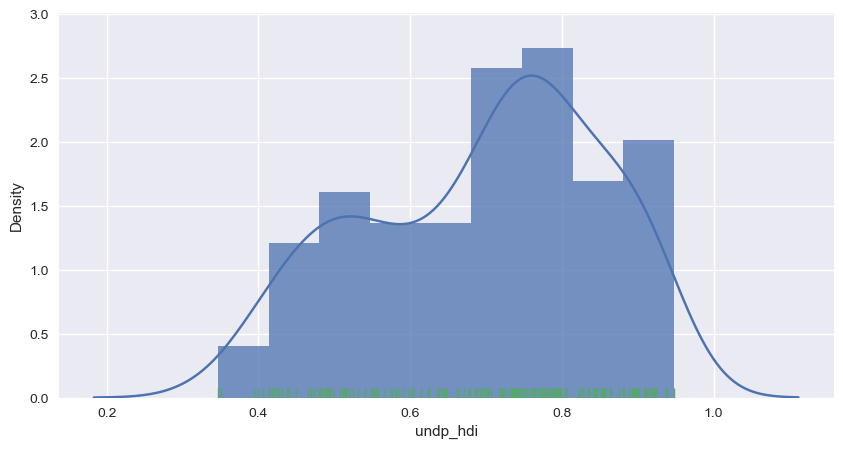

In [8]:
fig, axis = plt.subplots()
sns.histplot(df['undp_hdi'].dropna(), stat='density', ax=axis, lw=0)
sns.kdeplot(df['undp_hdi'].dropna(), ax=axis)
sns.rugplot(df['undp_hdi'].dropna(), ax=axis)

# Conteo de frecuencias

Con seaborn se puede hacer con la funcion sns.countplot(). Con el parametro order se pueden ordenar los datos!

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cname', ylabel='count'>

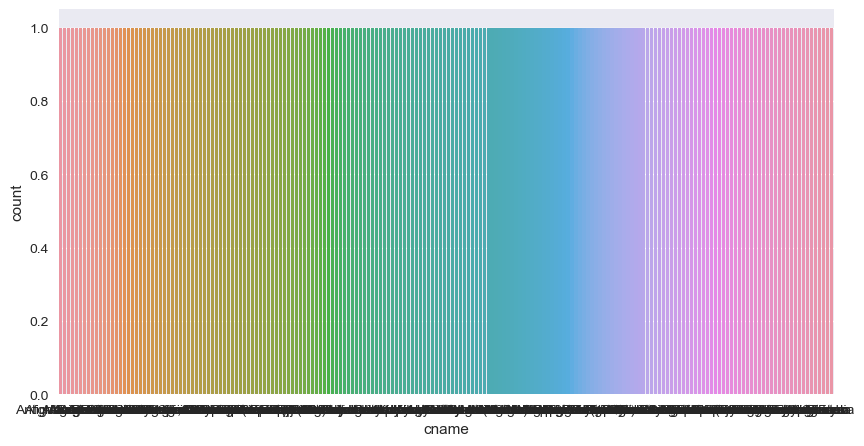

In [9]:
sns.countplot(df['cname'])

# Swarm plot

Se hacen con sns.swarmplot(x, y, hue)

# Facet Grid

Permite graficar multiples figuras condicional a un valor en especifico. Al final es hacer grillas
o subplots

1. Primero se inicializa el FacetGrid

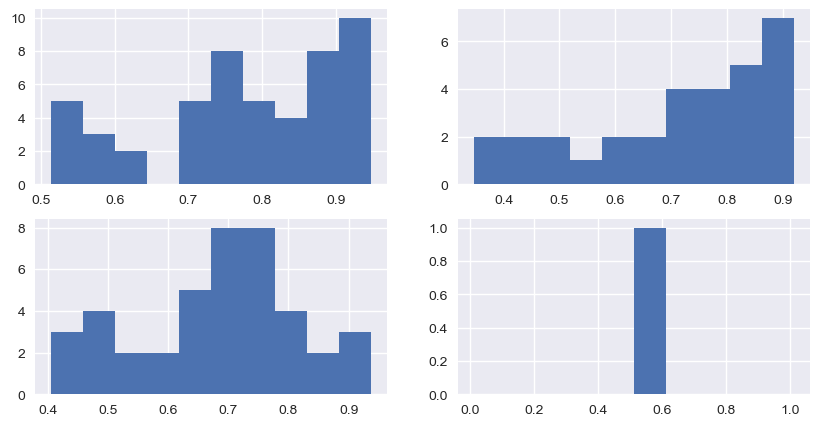

In [16]:
gol_0 = df[df['gol_inst'] == 0.0]['undp_hdi'].dropna()
gol_1 = df[df['gol_inst'] == 1.0]['undp_hdi'].dropna()
gol_2 = df[df['gol_inst'] == 2.0]['undp_hdi'].dropna()
gol_4 = df[df['gol_inst'] == 4.0]['undp_hdi'].dropna()

variables = [gol_0, gol_1, gol_2, gol_4]

for indice, serie in enumerate(variables):
    plt.subplot(2, 2, indice + 1)
    plt.hist(serie)



# FacetGrid con Seaborn

Hay que inicializar la FacetGrid, luego darle la variable que queremos que se grafique en la grid.
Al final hay que generar las grillas que se quieren graficar, y luego la funcion y los datos que
se quieren graficar

c:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


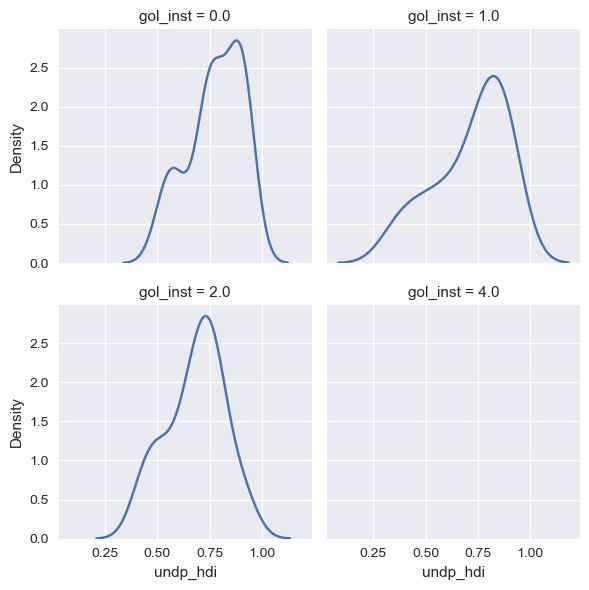

In [22]:
grid = sns.FacetGrid(df, col='gol_inst', col_wrap=2)
grid.map(sns.kdeplot, 'undp_hdi')

# Scatter Plot

Permite ver la relacion o correlacion entre dos variables! Podemos ver que tan juntas van dos
variables

Text(0.5, 1.0, 'Calidad del gobierno en funcion del indice de desarrollo humano')

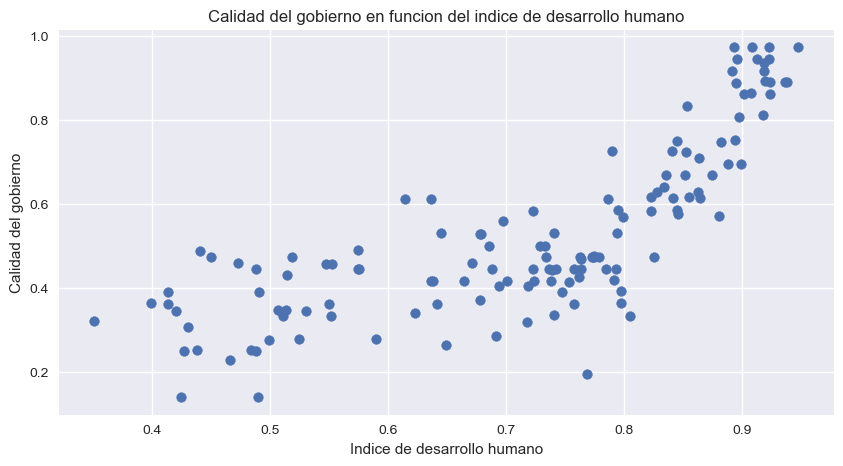

In [26]:
# Aqui se relaciona el indice de desarrollo humano en X, y la calidad del gobierno en el eje Y
plt.scatter(df['undp_hdi'], df['icrg_qog'])
plt.ylabel('Calidad del gobierno')
plt.xlabel('Indice de desarrollo humano')
plt.title('Calidad del gobierno en funcion del indice de desarrollo humano')

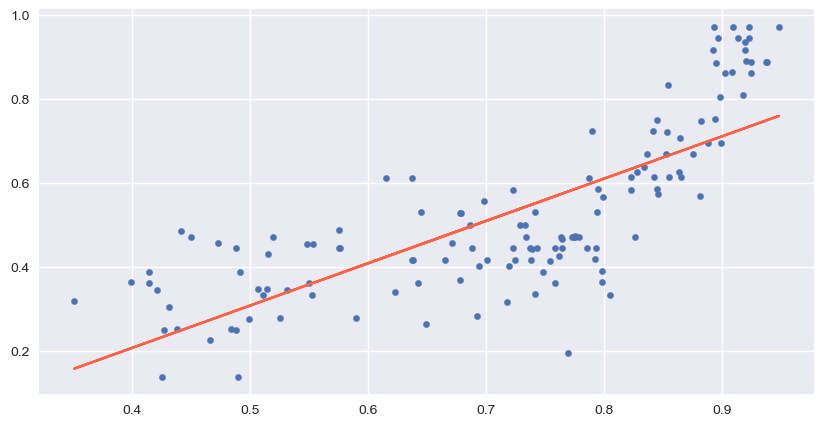

In [46]:
scatter_data = df[['undp_hdi', 'icrg_qog', 'ccodealp']].dropna().copy()
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker='o', s=20)

pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'], scatter_data['icrg_qog'], 1)\
# O tambien , para hacer la recta

valores_y = [(pendiente * x) + intercepto for x in scatter_data['undp_hdi']]
ax.plot(scatter_data['undp_hdi'], valores_y, color='tomato')


# for i in scatter_data.index:
#     ax.text(
#         x=scatter_data.loc[i, 'undp_hdi'],
#         y=scatter_data.loc[i, 'icrg_qog'],
#         s=scatter_data.loc[i, 'ccodealp']

#     )


# Como hacer un ScatterPlot con la regresion lineal en Seaborn

Se hace con sns.jointplot(x, y, kind='reg')

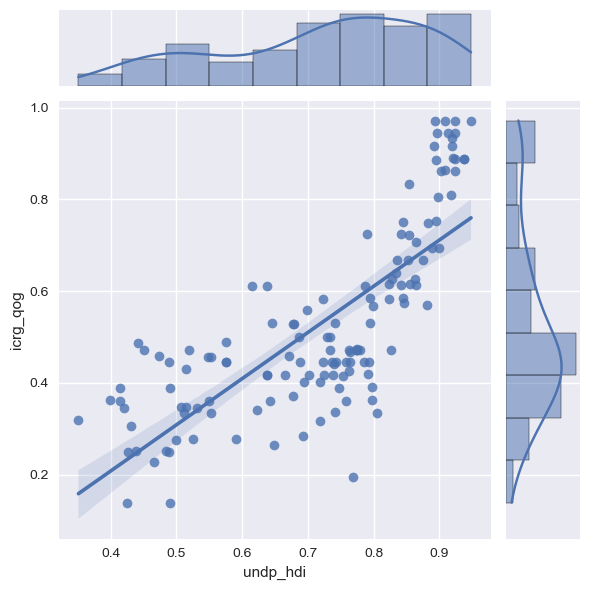

In [49]:
sns.jointplot(
    x=scatter_data['undp_hdi'],
    y=scatter_data['icrg_qog'],
    kind='reg'
)

# Boxplots

Permiten separar los datos en cuartiles, y permite ver los outliers. Recordar que los valores de
los cuartiles son: minimo, Q1 (25%), Q2 o Mediana (50%), Q3 (75%) y Maximo (100%).

## Con Matplotlib

- Para calcular los cuartiles 
```python
np.quantile(df['undp_hdi'], 0.25)
```

## Con pandas


- Para calcular los cuartiles
```python
q0, q1, q2, q3, q5 = df['undp_hdi'].quantile([0, 0.25, 0.5, 0.75, 1])
```

De los graficos de caja y bigotes, recordar que la el bigote superior e inferior se calculan
de la siguiente manera:

Q1 - 1.5 * Rango Inter Cuartil
Q3 - 1.5 * Rango Inter Cuartil. 

Si cualquier valor esta mas alla de estos valores, entonces son considerados outliers.

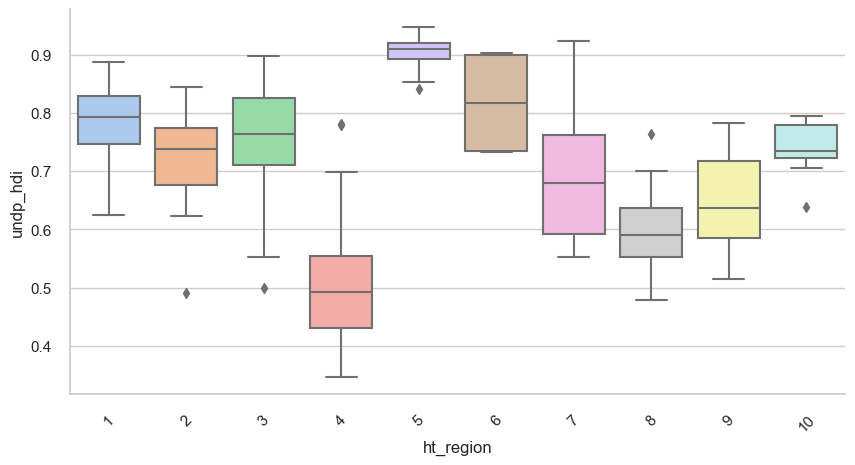

In [62]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.boxplot(data=df, x='ht_region', y='undp_hdi')
plt.xticks(rotation=45)
sns.despine()